# Project Topic

Use 'Real E-state Valuation’ database:	use linear regression, logistic regression to justify the outcome using the databas.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

## Importing the dataset

    Dataset : Real Estate Valuation Dataset
    Source : UCI Machine Learning Repository
    Feautures : 6
    Samples : 414
    Link : https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

### Descrption of Dataset Attributes
- No : Serial No (ID)
- X1 transaction date : Date of transaction
- X2 house age : Age of house in years
- X3 distance to the nearest MRT station : in meter
- X4 number of convenience stores : number of convenience stores in the living circle on foot
- X5 latitude : geographic coordinate, latitude
- X6 longitude : geographic coordinate, longitude
- Y house price of unit area : 10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared(Target variable)

In [4]:
df = pd.read_excel('real_estate_valuation.xlsx', index_col=0)

In [5]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6


In [6]:
df.shape

(414, 7)

In [7]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


## Feature Extraction

Extracting the transaction year from the Transaction Date feature and dropping the transaction date since the date is not in desired format and doesnot give meaningful insight.

In [10]:
df['transaction year'] = df['X1 transaction date'].apply(lambda x: int(x))
df = df.drop(columns = 'X1 transaction date')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
 6   transaction year                        414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 25.9 KB


## EDA

### 1. Univariate Analysis
   - Histogram Plot : Used to visualize the distribution of each feature. Histograms provide insight into the shape, spread, and central tendencies of individual variables, helping to identify any skewness, outliers, or unusual distributions within the data.
   - Box Pot : Created to identify outliers and understand the range and quartiles of continuous variables. Box plots allow for quick identification of the spread and median of the data, offering insights into potential data quality issues or areas for transformation.
### 2. Bivariate Analysis
   - Correlation Plot : Generated a correlation matrix to assess relationships between numerical variables. The heatmap visualization of correlation values helped to identify strongly correlated pairs, which can inform feature selection or collinearity concerns in further modeling steps.
  
## Adjustments to Dataset :

### Data Transformation for Outlier Handling and Normal Distribution
- The feature 'X3 distance to the nearest MRT station' shows high right skewness and a large amount of outliers. A log transformation has been applied to counteract that.

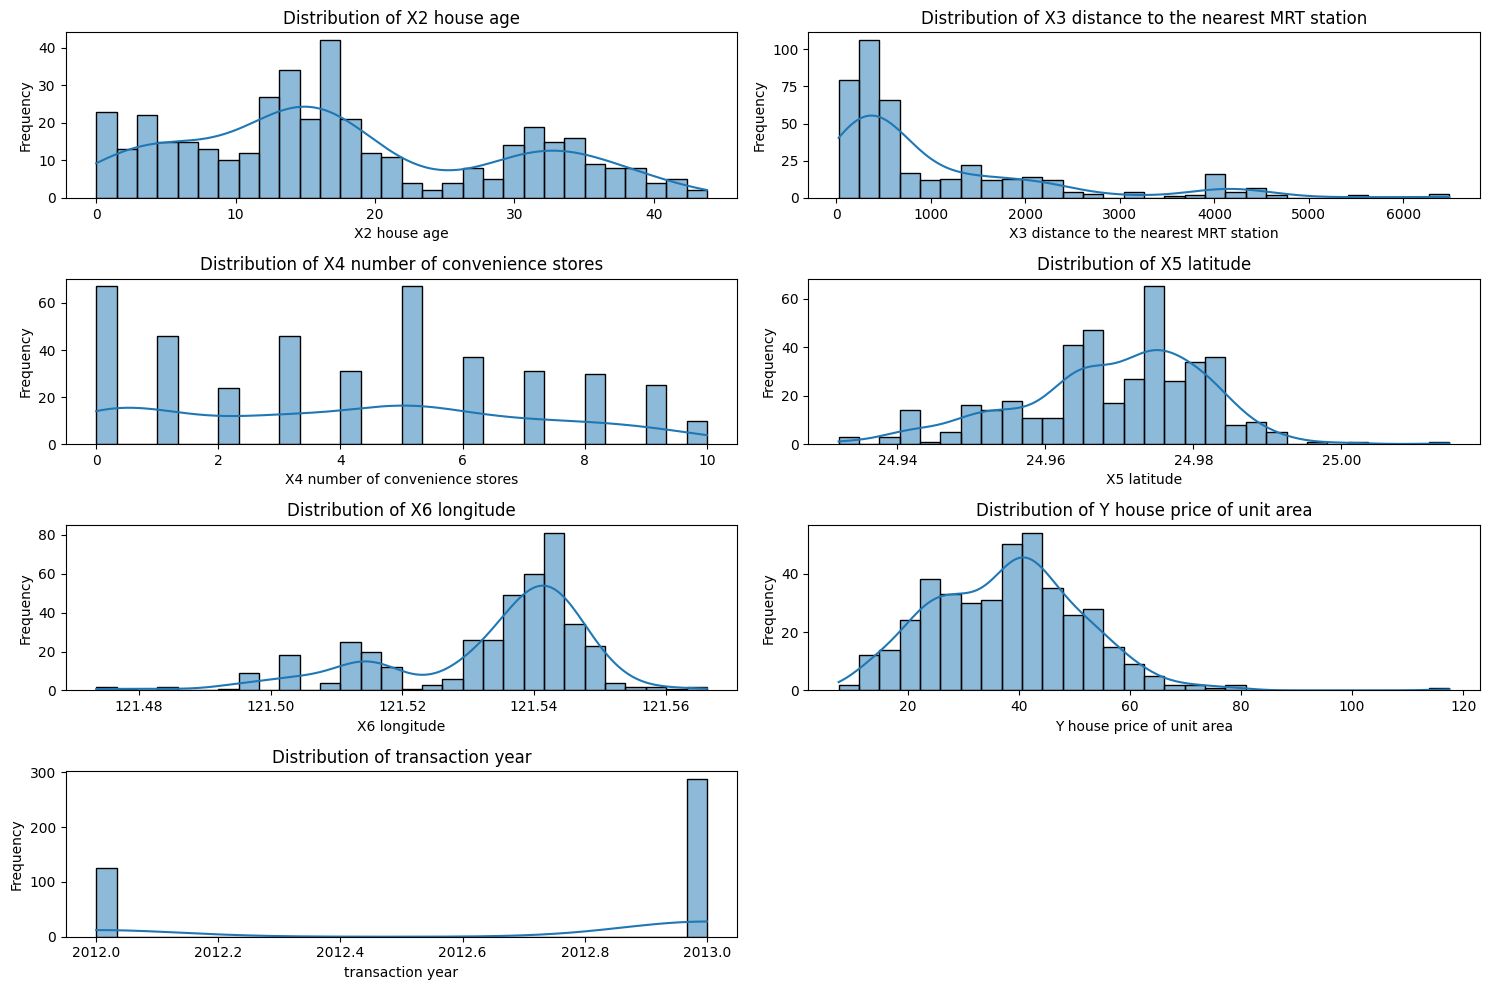

In [13]:
plt.figure(figsize=(15, 10))

for i, j in enumerate(df.columns, 1):
    plt.subplot(4, 2, i) 
    sns.histplot(df[j], kde=True, bins=30)
    plt.title(f'Distribution of {j}')
    plt.xlabel(j)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

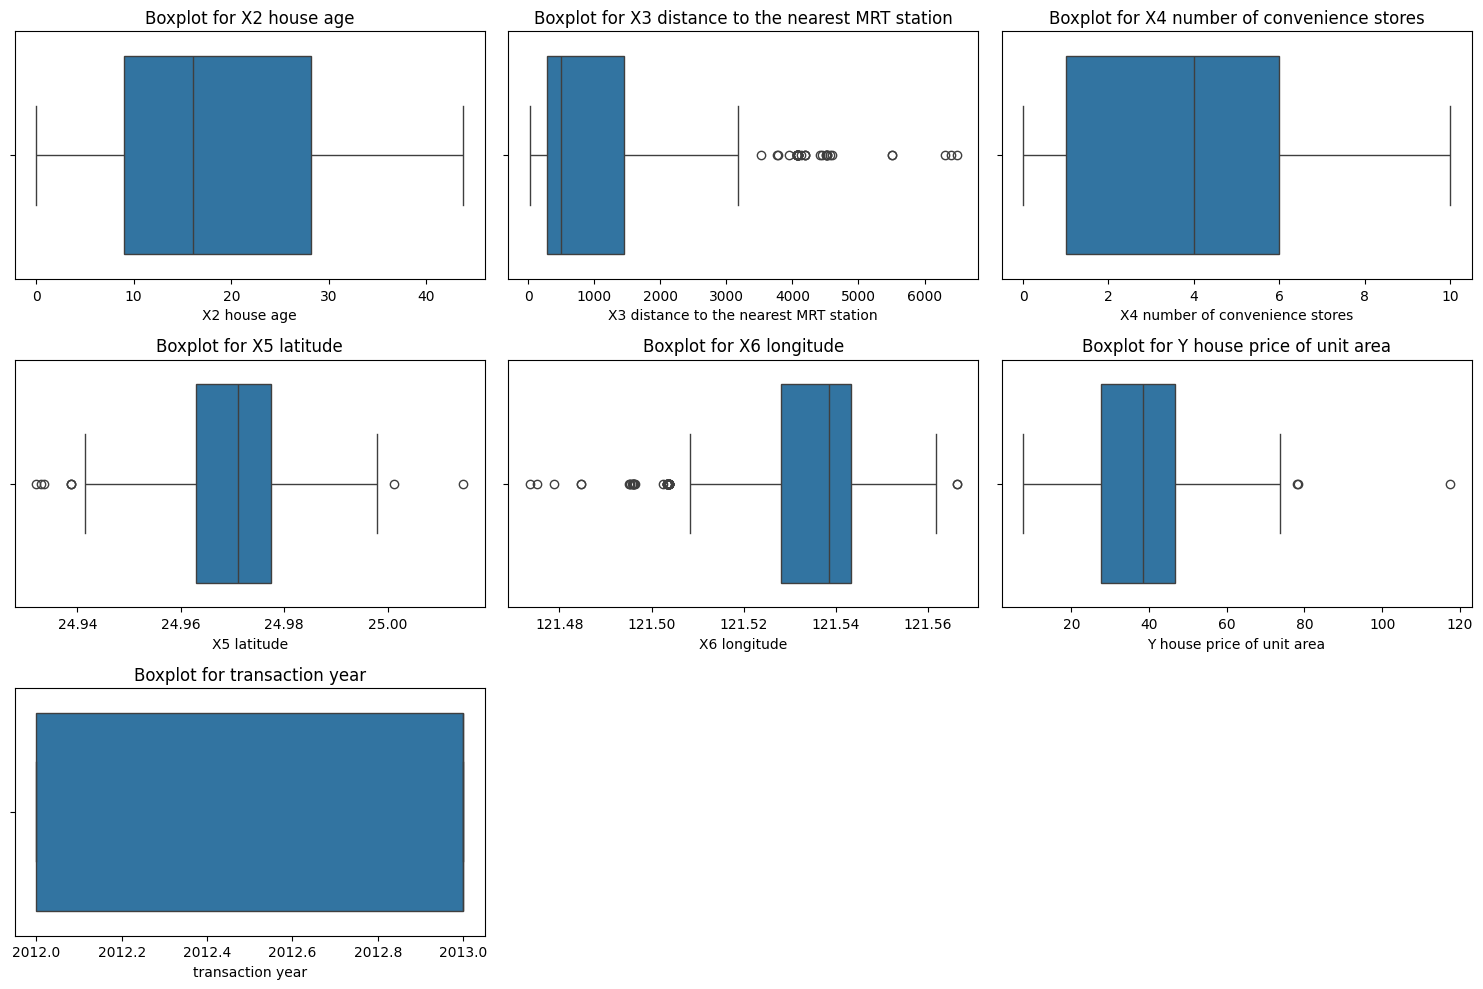

In [14]:
plt.figure(figsize=(15, 10))
for i, j in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[j])
    plt.title(f'Boxplot for {j}')
plt.tight_layout()
plt.show()

<Axes: >

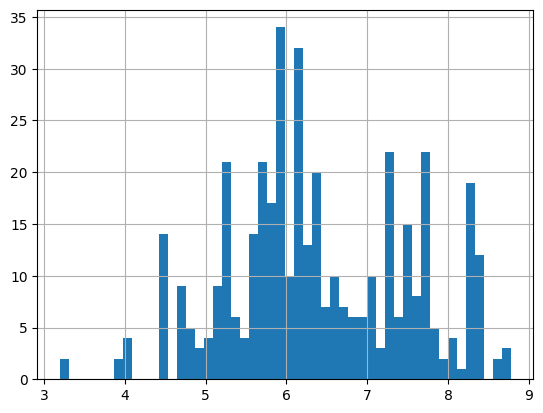

In [15]:
df['X3 distance to the nearest MRT station'] = np.log1p(df['X3 distance to the nearest MRT station'])

df['X3 distance to the nearest MRT station'].hist(bins=50)

<Axes: xlabel='X3 distance to the nearest MRT station'>

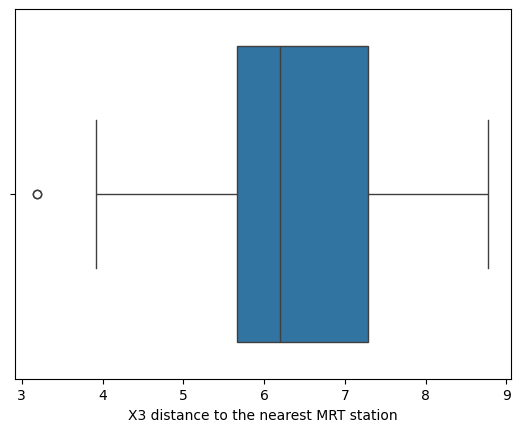

In [16]:
sns.boxplot(x=df['X3 distance to the nearest MRT station'])

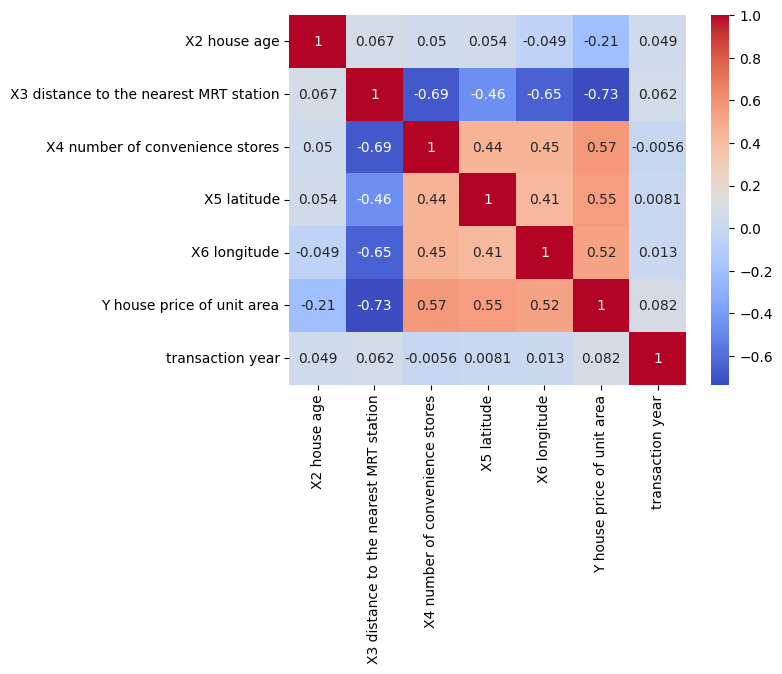

In [17]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Train and Test Splitting

The dataset has been randomly split into 75 - 25 % train and test samples with a random state set to 42.

In [19]:
X = df.drop(columns = 'Y house price of unit area')

In [20]:
Y = df['Y house price of unit area']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size = 0.25,
                                                    random_state = 42)

## Normalization
Applied Standard Scaler/ Z-score Normalization to the features.

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled, X_test_scaled

(array([[-1.15570946, -2.10551475,  0.9651532 , -0.96412362,  0.21189966,
          0.63459824],
        [-1.02286601, -1.68369968,  1.6359996 ,  0.38681929,  0.61072033,
         -1.57580014],
        [-0.96972863,  1.0904073 , -1.04738599, -1.43523397,  1.32779857,
          0.63459824],
        ...,
        [-0.56234204, -0.75762994, -1.04738599,  0.40841518, -0.23086453,
          0.63459824],
        [-1.11142831, -0.73262957,  0.62973   ,  0.50839616,  0.74787736,
         -1.57580014],
        [-1.42139636, -0.99810466,  0.62973   , -0.3026495 ,  0.46357614,
          0.63459824]]),
 array([[-1.42139636e+00, -9.98104663e-01,  6.29730005e-01,
         -3.02649502e-01,  4.63576142e-01,  6.34598245e-01],
        [-3.49792520e-01, -1.53504265e-01,  2.94306806e-01,
         -3.47440979e-01,  2.29210739e-01,  6.34598245e-01],
        [-1.51881489e+00, -6.83953828e-01, -1.04738599e+00,
          4.24412137e-01, -2.22208987e-01,  6.34598245e-01],
        [-3.94073670e-01, -1.11474490e+0

## Linear Regression 

### Model evaluation
Using GridSearchCV to find the best parameters for linear regression.
- Parameters experimented with : 'fit_intercept' and 'copy_X'
- Metric : R2-score

### Metrics used to display model performance
- Mean Absolute Error
- Root Mean Square Error
- R2-score


In [26]:
linear_regression_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

linear_regression_grid = GridSearchCV(estimator=LinearRegression(), param_grid=linear_regression_params, 
                                      scoring='r2', cv=5, n_jobs=-1)

linear_regression_grid.fit(X_train_scaled, Y_train)
best_lr_model = linear_regression_grid.best_estimator_
best_lr_params = linear_regression_grid.best_params_

print("Best Linear Regression Parameters:", best_lr_params)


Best Linear Regression Parameters: {'copy_X': True, 'fit_intercept': True}


In [27]:
lin_reg = LinearRegression() #default hyperparameter settings are found to be the best
lin_reg.fit(X_train_scaled, Y_train)
y_pred_linear = lin_reg.predict(X_test_scaled)

In [28]:
linear_mse = root_mean_squared_error(Y_test, y_pred_linear)
linear_r2 = r2_score(Y_test, y_pred_linear)
linear_mae = mean_absolute_error(Y_test, y_pred_linear)

## Logistic Regression

### Target Value Binarization
Since the target column is continuous, which is not suitable for logistic regression classifier used for classification problem, we binarize the target column by taking the median of the training set and making all the data greater than or equal to median to be 1 and rest to be 0.

### Model Evaluation
Using GridSearchCV to find the best parameters for logistic regression.
- Parameters experimented with : 'fit_intercept' and 'copy_X'
- Metric : R2-score

### Metrics used to show model performance
- Accuracy
- F1-score
- Precision
- Recall

In [30]:
median_price = Y_train.median()
y_train_binary = (Y_train >= median_price).astype(int)
y_test_binary = (Y_test >= median_price).astype(int)

In [31]:
logistic_regression_params = {
    'max_iter' : [1000, 5000, 10000]
    }

logistic_regression_grid = GridSearchCV(estimator=LogisticRegression(random_state = 42), param_grid=logistic_regression_params, 
                                      scoring='accuracy', cv=5, n_jobs=-1)

logistic_regression_grid.fit(X_train_scaled, y_train_binary)
best_log_model = logistic_regression_grid.best_estimator_
best_log_params = logistic_regression_grid.best_params_
print("Best Linear Regression Parameters:", best_log_params)

Best Linear Regression Parameters: {'max_iter': 1000}


In [32]:
log_reg = LogisticRegression(max_iter=1000, class_weight = 'balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_binary)
y_pred_logistic = log_reg.predict(X_test_scaled)

In [59]:
logistic_accuracy = accuracy_score(y_test_binary, y_pred_logistic)
logistic_precision = precision_score(y_test_binary, y_pred_logistic)
logistic_recall = recall_score(y_test_binary, y_pred_logistic)
logistic_f1 = f1_score(y_test_binary, y_pred_logistic)

## Displaying the Model Performances

In [62]:
performance_results = {
    'Metric': [
        'Root Mean Squared Error',
        'Mean Absolute Error',
        'R^2 Score',
        'Accuracy',
        'Precision',
        'Recall',
        'F1 Score'
    ],
    'Linear Regression': [
        linear_mse,
        linear_mae,
        linear_r2,
        None,  # No value for linear regression metrics
        None,
        None,
        None
    ],
    'Logistic Regression': [
        None,  # No value for logistic regression metrics
        None,
        None,
        logistic_accuracy,
        logistic_precision,
        logistic_recall,
        logistic_f1
    ]
}

# Create a DataFrame
results_df = pd.DataFrame(performance_results)

# Display the table
print(results_df)

                    Metric  Linear Regression  Logistic Regression
0  Root Mean Squared Error           7.355688                  NaN
1      Mean Absolute Error           4.780797                  NaN
2                R^2 Score           0.658892                  NaN
3                 Accuracy                NaN             0.836538
4                Precision                NaN             0.729167
5                   Recall                NaN             0.897436
6                 F1 Score                NaN             0.804598
